In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
import statistics
import random

### 1. Загрузка файла с анализируемыми данными

In [2]:
# загрузим и посмотрим на имеющиеся данные
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1. satisfaction_level - уровень удовлетворенности работой
2. last_evaluation - время с момента последней оценки в годах
3. number_projects - количество проектов, выполненных за время работы
4. average_monthly_hours - среднее количество часов на рабочем месте в месяц
5. time_spend_company - стаж работы в компании в годах
6. work_accident - происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

### 2. Основные статистические характеристики данных и предварительный анализ

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# краткое описание представленных данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


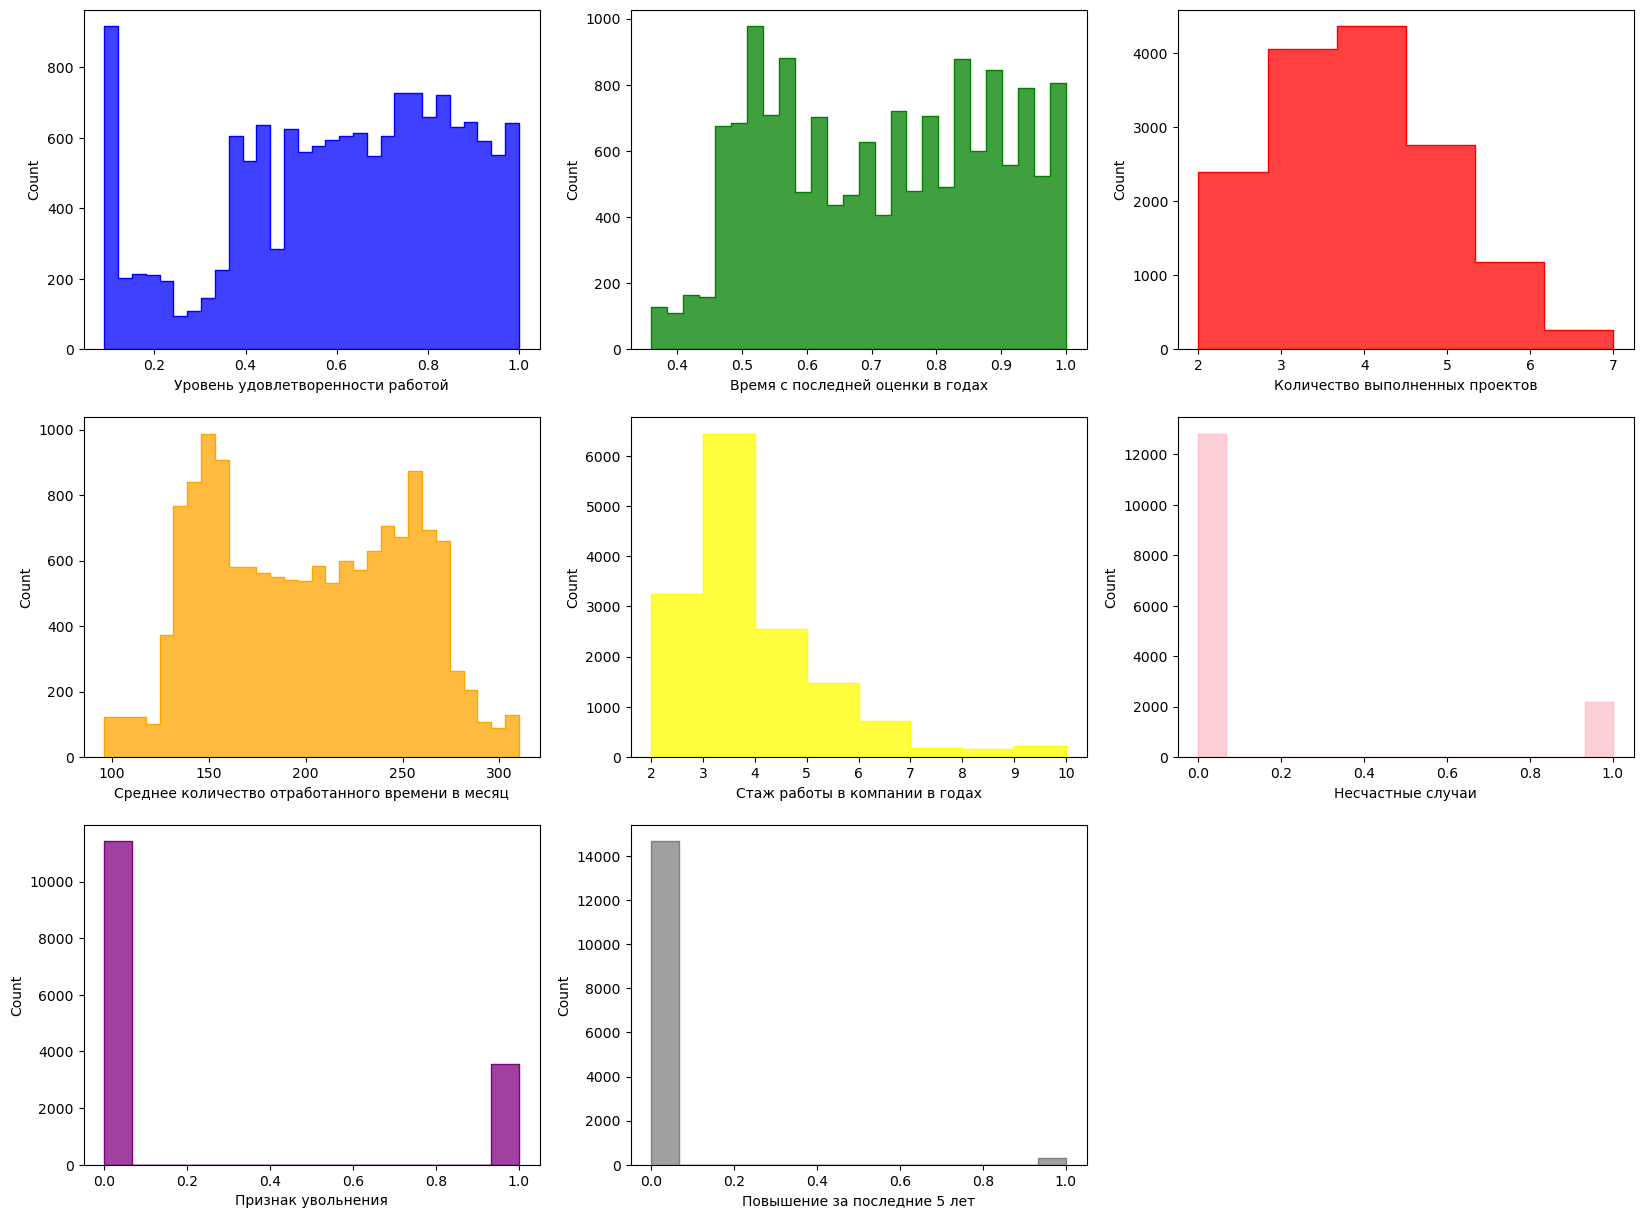

In [5]:
# гистограммы числовых характеристик
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

params = [
    {'x': 'satisfaction_level', 'xlabel': 'Уровень удовлетворенности работой'},
    {'x': 'last_evaluation', 'xlabel': 'Время с последней оценки в годах'},
    {'x': 'number_project', 'xlabel': 'Количество выполненных проектов', 'bins': 6},
    {'x': 'average_montly_hours', 'xlabel': 'Среднее количество отработанного времени в месяц', 'bins': 30},
    {'x': 'time_spend_company', 'xlabel': 'Стаж работы в компании в годах', 'bins': 8},
    {'x': 'Work_accident', 'xlabel': 'Несчастные случаи'},
    {'x': 'left', 'xlabel': 'Признак увольнения'},
    {'x': 'promotion_last_5years', 'xlabel': 'Повышение за последние 5 лет'}
]

colors = ["blue", "green", "red", "orange", "yellow", "pink", "purple", "grey"]

for i, param in enumerate(params):
    row = i // 3
    col = i % 3
    sns.histplot(data, x=param['x'], element='step', ax=axes[row, col], color=colors[i], bins=param.get('bins', 'auto'))
    axes[row, col].set_xlabel(param['xlabel'])

fig.delaxes(axes[2,2])

(0.0, 988.0)

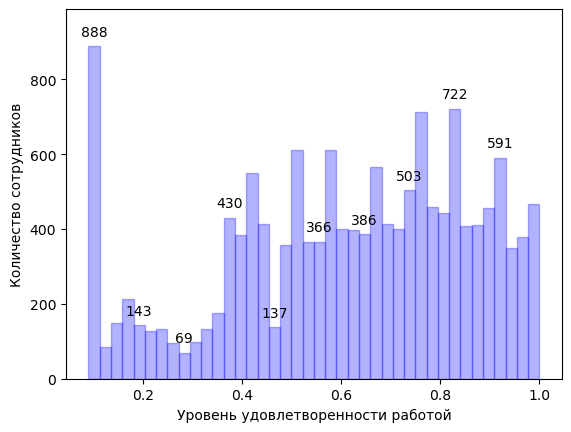

In [6]:
# подробная гистограмма по характеристике Уровень удовлетворенности работой
n, bins, _ = plt.hist(data['satisfaction_level'], bins=40, edgecolor='blue', alpha=0.3, color='blue') 
plt.xlabel('Уровень удовлетворенности работой')
plt.ylabel('Количество сотрудников')

x = (bins[1:] + bins[:-1]) / 2

for i, y in enumerate(n):
    if i % 4 == 0:
        plt.text(x[i], y+20, int(y), ha='center', va='bottom')
    
plt.ylim([0, max(n)+100])

(0.0, 981.0)

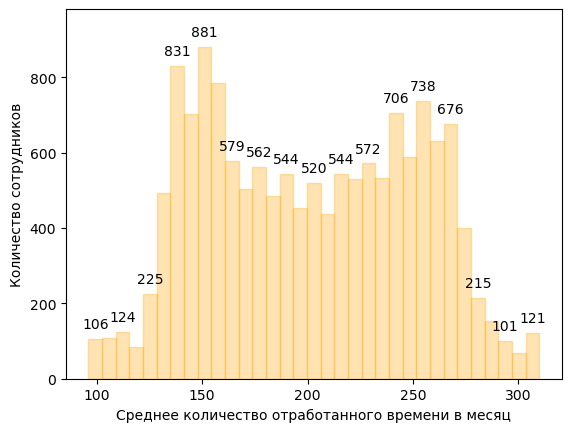

In [7]:
# подробная гистограмма по характеристике Среднее количество отработанного времени в месяц
n, bins, _ = plt.hist(data['average_montly_hours'], bins=33, edgecolor='orange', alpha=0.3, color='orange') 
plt.xlabel('Среднее количество отработанного времени в месяц')
plt.ylabel('Количество сотрудников')

x = (bins[1:] + bins[:-1]) / 2

for i, y in enumerate(n):
    if i % 2 == 0:
        plt.text(x[i], y+20, int(y), ha='center', va='bottom')
    
plt.ylim([0, max(n)+100])

(0.0, 4865.0)

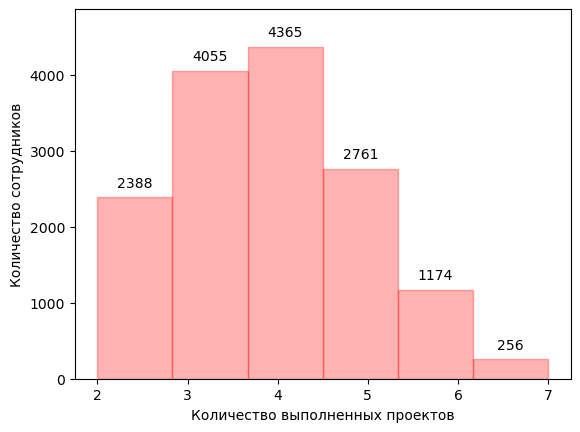

In [8]:
# подробная гистограмма по характеристике Количество выполненных проектов
n, bins, _ = plt.hist(data['number_project'], bins=6,edgecolor='red', alpha=0.3, color='red') 
plt.xlabel('Количество выполненных проектов')
plt.ylabel('Количество сотрудников')

x = (bins[1:] + bins[:-1]) / 2

for i, y in enumerate(n):
    plt.text(x[i], y+100, int(y), ha='center', va='bottom')

plt.ylim([0, max(n)+500])

(0.0, 7443.0)

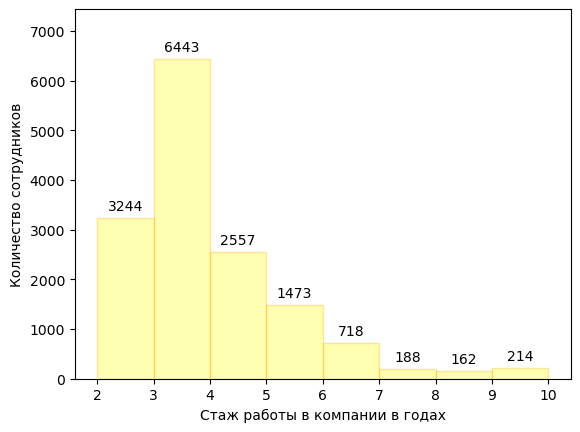

In [9]:
# подробная гистограмма по характеристике Стаж работы в компании
n, bins, _ = plt.hist(data['time_spend_company'], bins=8, edgecolor='orange', alpha=0.3, color='yellow') 
plt.xlabel('Стаж работы в компании в годах')
plt.ylabel('Количество сотрудников')

x = (bins[1:] + bins[:-1]) / 2

for i, y in enumerate(n):
    plt.text(x[i], y+100, int(y), ha='center', va='bottom')

plt.ylim([0, max(n)+1000])

In [10]:
# количество несчастных случаев
accident = data['Work_accident'].value_counts().reset_index().rename(columns={'index': 'Метка несчастного случая', 'Work_accident': 'Количество сотрудников'})
accident['Метка несчастного случая'] = accident['Метка несчастного случая'].replace({0: 'Нет', 1: 'Да'})
accident['Доля сотрудников, %'] = round(accident['Количество сотрудников'] / len(data), 3)*100
accident

,Метка несчастного случая,Количество сотрудников,"Доля сотрудников, %"
0,Нет,12830,85.5
1,Да,2169,14.5


In [11]:
# количество уволившихся сотрудников
left = data['left'].value_counts().reset_index().rename(columns={'index': 'Метка увольнения', 'left': 'Количество сотрудников'})
left['Метка увольнения'] = left['Метка увольнения'].replace({0: 'Нет', 1: 'Да'})
left['Доля сотрудников, %'] = round(left['Количество сотрудников'] / len(data), 3)*100
left

,Метка увольнения,Количество сотрудников,"Доля сотрудников, %"
0,Нет,11428,76.2
1,Да,3571,23.8


In [12]:
# повышение за последние 5 лет
promotion = data['promotion_last_5years'].value_counts().reset_index().rename(columns={'index': 'Метка повышения', 'promotion_last_5years': 'Количество сотрудников'})
promotion['Метка повышения'] = promotion['Метка повышения'].replace({0: 'Нет', 1: 'Да'})
promotion['Доля сотрудников,%'] = round(promotion['Количество сотрудников'] / len(data), 3)*100
promotion

,Метка повышения,Количество сотрудников,"Доля сотрудников,%"
0,Нет,14680,97.9
1,Да,319,2.1


In [13]:
# количество сотрудников в каждом отделе
department = data['department'].value_counts().reset_index().rename(columns={'index': 'Отдел', 'department': 'Количество сотрудников'})
department['Доля сотрудников,%'] = round(department['Количество сотрудников'] / len(data), 3)*100
department

,Отдел,Количество сотрудников,"Доля сотрудников,%"
0,sales,4140,27.6
1,technical,2720,18.1
2,support,2229,14.9
3,IT,1227,8.2
4,product_mng,902,6.0
5,marketing,858,5.7
6,RandD,787,5.2
7,accounting,767,5.1
8,hr,739,4.9
9,management,630,4.2


In [14]:
# распределение сотрудников по зарплатам
salary = data['salary'].value_counts().reset_index().rename(columns={'index': 'Зарплата', 'salary': 'Количество сотрудников'})
salary['Доля сотрудников,%'] = round(salary['Количество сотрудников'] / len(data), 3)*100
salary['Зарплата'] = salary['Зарплата'].replace({'low':'Низкая', 'medium':'Средняя', 'high':'Высокая'})
salary

,Зарплата,Количество сотрудников,"Доля сотрудников,%"
0,Низкая,7316,48.8
1,Средняя,6446,43.0
2,Высокая,1237,8.2


In [15]:
# распределение сотрудников по зарплатам в каждом отделе по отдельности
department_salary = data.groupby(['department','salary'])['satisfaction_level'].count().unstack().reset_index().rename(columns={'department':'Отдел', 'high':'Высокая зарплата', 'low':'Низкая зарплата', 'medium':'Средняя зарплата'})
department_salary = department_salary.reset_index()
department_salary

salary,index,Отдел,Высокая зарплата,Низкая зарплата,Средняя зарплата
0,0,IT,83,609,535
1,1,RandD,51,364,372
2,2,accounting,74,358,335
3,3,hr,45,335,359
4,4,management,225,180,225
5,5,marketing,80,402,376
6,6,product_mng,68,451,383
7,7,sales,269,2099,1772
8,8,support,141,1146,942
9,9,technical,201,1372,1147


Text(0, 0.5, 'Количество сотрудников')

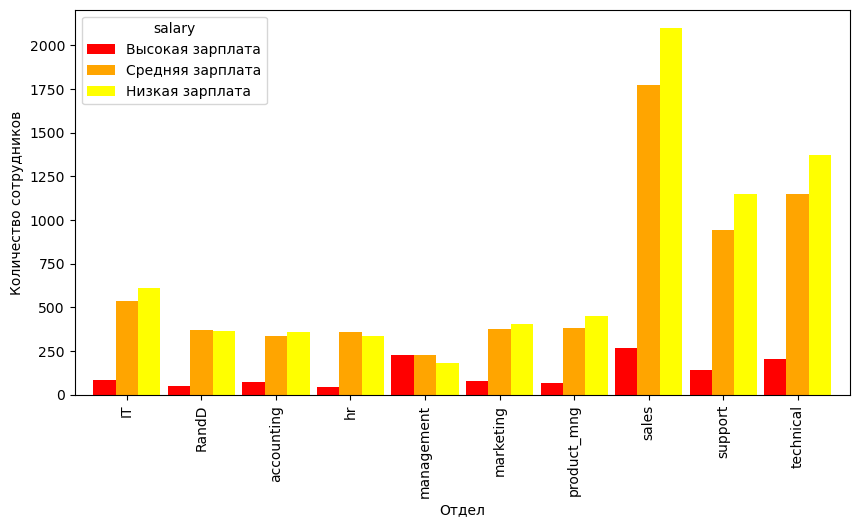

In [16]:
department_salary.plot.bar(x='Отдел', y=['Высокая зарплата','Средняя зарплата','Низкая зарплата'], width=0.9, color=['red','orange','yellow'], figsize=(10,5))
plt.ylabel('Количество сотрудников')

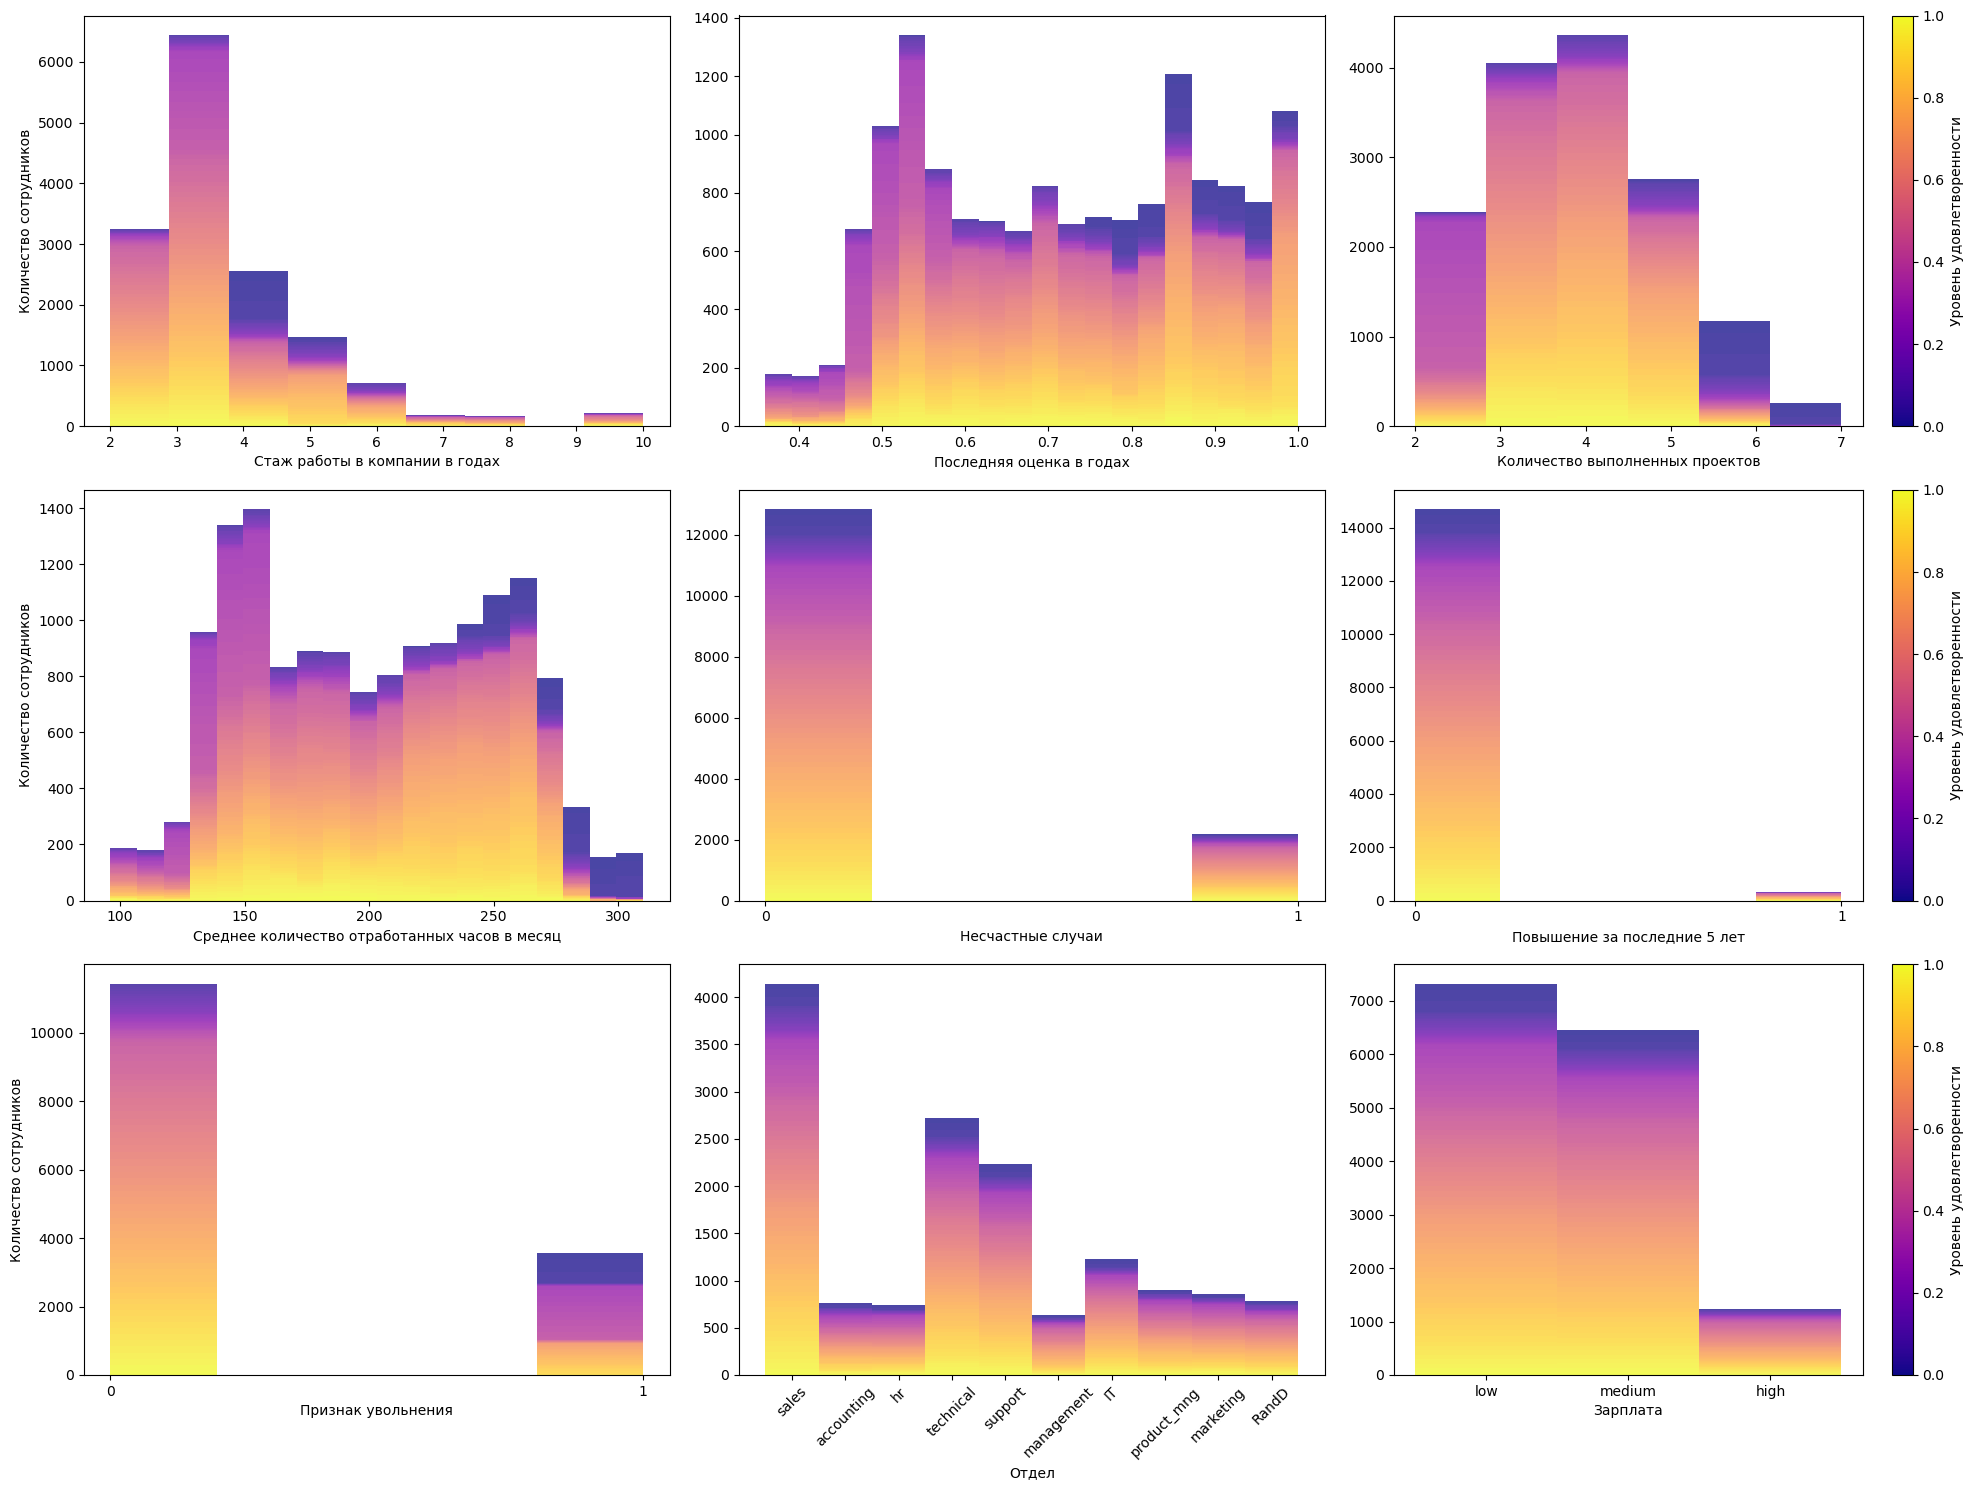

In [17]:
# отражение Уровня удовлетворенности работой в других характеристиках
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

plot_data = [
    ('time_spend_company', 'Стаж работы в компании в годах', 'Количество сотрудников', 9),
    ('last_evaluation', 'Последняя оценка в годах', '', 20),
    ('number_project', 'Количество выполненных проектов', '', 6),
    ('average_montly_hours', 'Среднее количество отработанных часов в месяц', 'Количество сотрудников', 20),
    ('Work_accident', 'Несчастные случаи', '', 5),
    ('promotion_last_5years', 'Повышение за последние 5 лет', '', 5),
    ('left', 'Признак увольнения', 'Количество сотрудников', 5),
    ('department', 'Отдел', '', 10),
    ('salary', 'Зарплата', '', 5)
]

for i, (x, xlabel, ylabel, bins) in enumerate(plot_data):
    ax = axes.flatten()[i]
    sns.histplot(data, x=x, multiple="stack", edgecolor='none', ax=ax, bins=bins, hue='satisfaction_level', palette='plasma', legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if i in (2, 5, 8):
        scatter_plot = ax.scatter([], [], c=[], cmap='plasma')
        plt.colorbar(scatter_plot, label='Уровень удовлетворенности')
    if i in (4, 5, 6):
        ax.set_xticks([0, 1])
    if i == 7:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
plt.tight_layout()
plt.show()

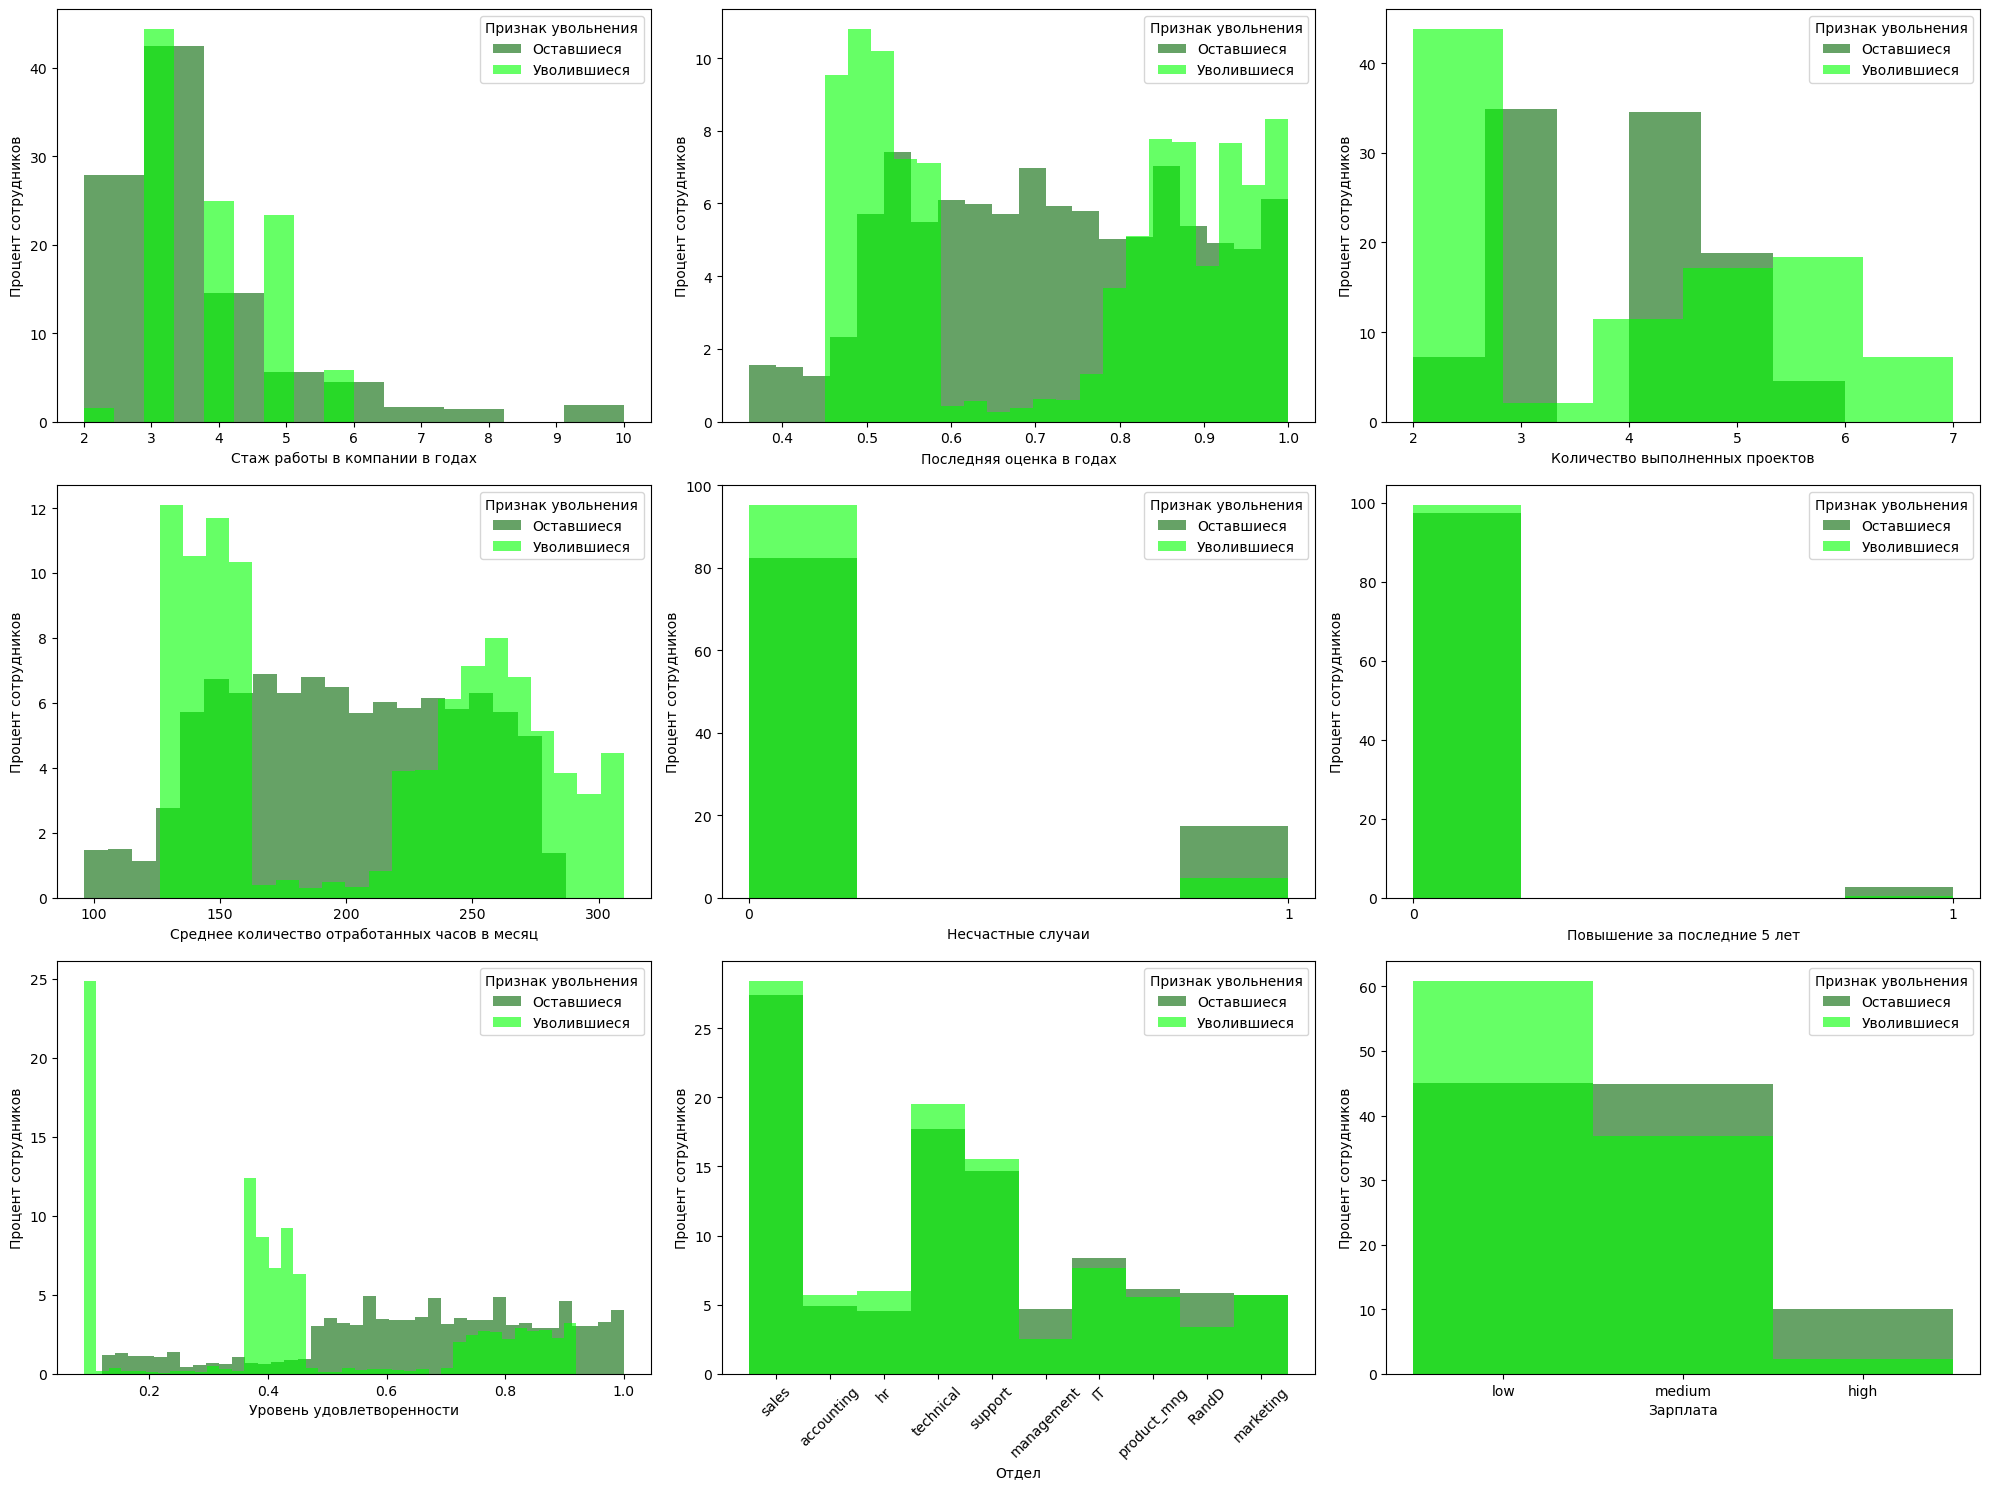

In [18]:
# отражение Признака увольнения в остальных характеристиках (нормализованные гистограммы)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

column_names = [
    ('time_spend_company', 'Стаж работы в компании в годах', 9),
    ('last_evaluation', 'Последняя оценка в годах', 20),
    ('number_project', 'Количество выполненных проектов', 6),
    ('average_montly_hours', 'Среднее количество отработанных часов в месяц', 20),
    ('Work_accident', 'Несчастные случаи', 5),
    ('promotion_last_5years', 'Повышение за последние 5 лет', 5),
    ('satisfaction_level', 'Уровень удовлетворенности', 40),
    ('department', 'Отдел', 10),
    ('salary', 'Зарплата', 5)
]

legend_labels = ['Оставшиеся', 'Уволившиеся']

for i, (column, xlabel, bins) in enumerate(column_names):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=data.where(data['left'] == 0), x=column, edgecolor='none', color='darkgreen', alpha=0.6, bins=bins, ax=ax, stat='percent')
    sns.histplot(data=data.where(data['left'] == 1), x=column, edgecolor='none', color='#00FF00', alpha=0.6, bins=bins, ax=ax, stat='percent')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Процент сотрудников')
    ax.legend(title='Признак увольнения', labels=legend_labels)
    if column in ['Work_accident', 'promotion_last_5years']:
        ax.set_xticks([0, 1])
    if column in ['department']:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### 3. Преобразование типа данных

In [19]:
# выведем столбцы только с номинальным типом данных (object)
data.select_dtypes(include='object')

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [20]:
# замена значений в изначальном датасете при помощи класса OrdinalEncoder из модуля preprocessing
from sklearn import preprocessing # импортируем модуль

transformation = preprocessing.OrdinalEncoder(dtype='int64', 
categories=[['product_mng', 'marketing', 'RandD', 'hr', 'accounting', 'support', 'IT', 'management', 'sales', 'technical'], ['low', 'medium', 'high']]).fit_transform(data[['department', 'salary']])
trans_data = data.copy()
trans_data[['department', 'salary']] = transformation
trans_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,8,0
1,0.80,0.86,5,262,6,0,1,0,8,1
2,0.11,0.88,7,272,4,0,1,0,8,1
3,0.72,0.87,5,223,5,0,1,0,8,0
4,0.37,0.52,2,159,3,0,1,0,8,0
5,0.41,0.50,2,153,3,0,1,0,8,0
6,0.10,0.77,6,247,4,0,1,0,8,0
7,0.92,0.85,5,259,5,0,1,0,8,0
8,0.89,1.00,5,224,5,0,1,0,8,0
9,0.42,0.53,2,142,3,0,1,0,8,0


In [21]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


### 4. Кластеризация

In [22]:
# удаление лишних столбцов
trans_data2=trans_data.drop(columns=['last_evaluation', 'Work_accident', 'department'])

In [23]:
# стандартизация данных
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(trans_data2)

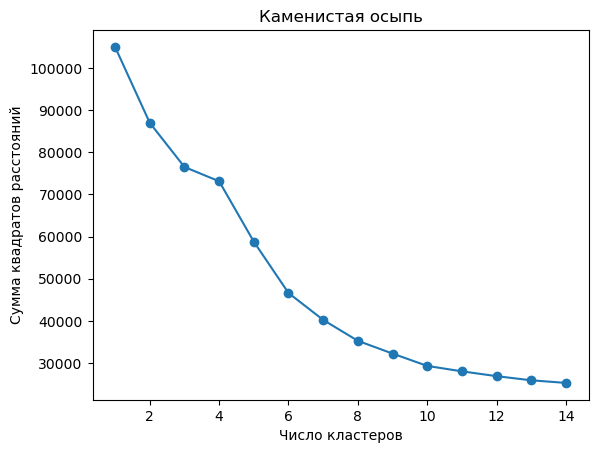

In [24]:
# определение числа кластеров (график Каменистая осыпь)
from sklearn.cluster import KMeans 

k = range(1, 15)
dist = [KMeans(n_clusters=n, random_state=42, n_init='auto').fit(scaled_data).inertia_ for n in k]

plt.plot(k, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

In [25]:
# применяем метод k-средних для выявления кластеров
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto').fit(scaled_data)

In [26]:
# средние значения по каждому кластеру
trans_data2['cluster'] = kmeans.labels_
trans_data2.groupby('cluster').mean()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
cluster,,,,,,,
0,0.742600,3.772192,245.151681,2.880207,0.002585,0.0,0.461649
1,0.443453,5.307368,255.681263,4.946947,0.805895,0.0,0.444632
2,0.643826,3.725882,167.420492,3.253493,0.000665,0.0,0.000000
3,0.651369,3.707311,178.638247,3.492022,0.001905,0.0,1.253632
4,0.656019,3.752351,199.849530,4.166144,0.059561,1.0,1.018809
5,0.416300,2.064237,146.891909,3.040766,1.000000,0.0,0.412600


In [27]:
# процент каждого кластера в общем количестве наблюдений
round(trans_data2['cluster'].value_counts()/14999*100)

3    28.0
0    23.0
2    20.0
1    16.0
5    11.0
4     2.0
Name: cluster, dtype: float64

In [28]:
del trans_data2['cluster']

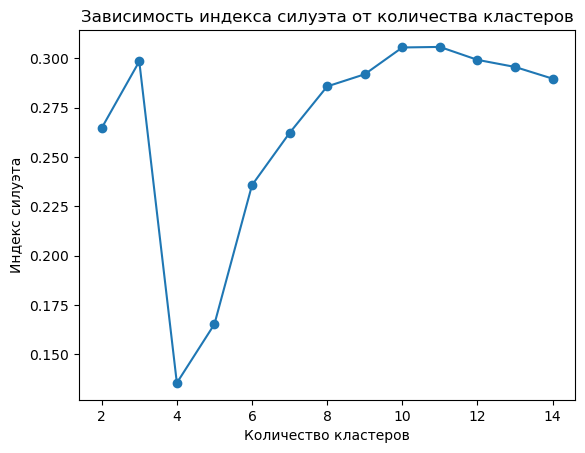

In [29]:
# индекс силуэта для оценки качества кластеризации
from sklearn.metrics import silhouette_score

k = range(2, 15)
silhouette_scores = [silhouette_score(scaled_data, KMeans(n_clusters=n, random_state=42, n_init='auto').fit_predict(scaled_data)) for n in k]

plt.plot(k, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Индекс силуэта')
plt.title('Зависимость индекса силуэта от количества кластеров')
plt.show()                                    

In [30]:
# индекс силуэта при 6 кластерах
round(silhouette_score(scaled_data, KMeans(n_clusters=6, random_state=42, n_init='auto').fit_predict(scaled_data)),2)

0.24

### 5. Проверка гипотез

#### Уволившиеся сотрудники были недовольны работой, в отличие от оставшихся в организации

In [78]:
# статистические характеристики по признаку Уровень удовлетворенности работой по 2м выборкам
data.groupby('left')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.00
1,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92


In [79]:
# с целью построения нормализованной гистограммы разобьем данные на 2 выборки
left = data[data['left'] == 1]['satisfaction_level']
not_left = data[data['left'] == 0]['satisfaction_level']

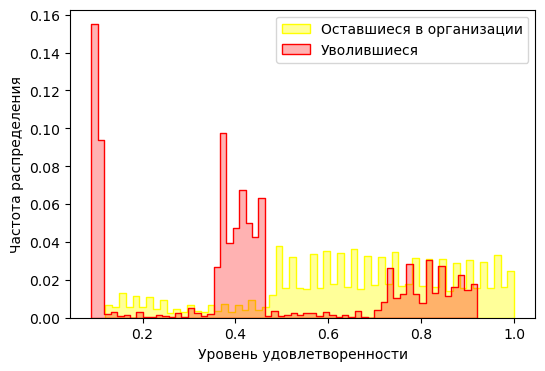

In [80]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=not_left, element='step', color='yellow', stat='probability', alpha=0.4, bins=60)
sns.histplot(data=left, element='step', color='red', stat='probability', alpha=0.3, bins=60)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Частота распределения')
plt.legend(['Оставшиеся в организации','Уволившиеся'])

In [81]:
# расчет дисперсии для двух выборок
print('Дисперсия для выборки по уволившимся сотрудникам:', round(np.var(left), 10))
print('Дисперсия для выборки по неуволившимся сотрудникам:', round(np.var(not_left), 10))

Дисперсия для выборки по уволившимся сотрудникам: 0.0696413514
Дисперсия для выборки по неуволившимся сотрудникам: 0.0471299158


In [82]:
# тест Флигнера-Киллина на равенство дисперсий
fligner = scipy.stats.fligner(left, not_left)
if (fligner.pvalue < 0.05):
    print('Равенство дисперсий отклонено')
else:
    print('Равенство дисперсий не отклонено')
fligner 

Равенство дисперсий отклонено


FlignerResult(statistic=105.62446783672898, pvalue=8.912045579211674e-25)

In [83]:
# тест Манна-Уитни
mannwhitneyu =  scipy.stats.mannwhitneyu(left, not_left)
if (mannwhitneyu.pvalue < 0.05):
    print('Гипотеза об одинаковом уровне удовлетворенности работой отклонена. Нулевая гипотеза неверна')
else:
    print('Гипотеза об одинаковом уровне удовлетворенности работой не отклонена. Нулевая гипотеза верна')
mannwhitneyu

Гипотеза об одинаковом уровне удовлетворенности работой отклонена. Нулевая гипотеза неверна


MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

In [122]:
#количество уволившихся работников, уровень удовлетворенности которых меньше 0.5
left.loc[left <= 0.5].count()

2550

#### Уволившиеся сотрудники «выгорели» (выполняли большое число проектов)

In [37]:
# статистические характеристики по признаку Количество выполенных проектов по 2м выборкам
data.groupby('left')['number_project'].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,3.0,4.0,4.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,4.0,6.0,7.0


In [38]:
# с целью построения нормализованной гистограммы разобьем данные на 2 выборки
left = data[data['left'] == 1]['number_project']
not_left = data[data['left'] == 0]['number_project']

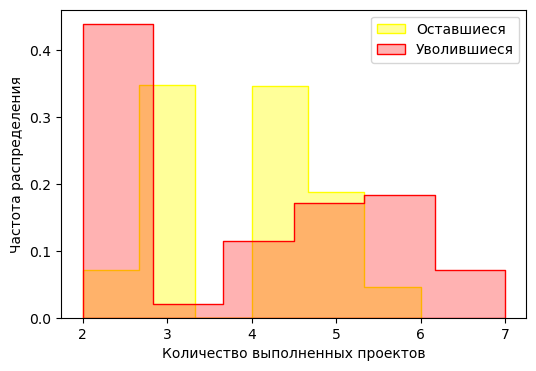

In [39]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=not_left, element='step', color='yellow', stat='probability', alpha=0.4, bins=6)
sns.histplot(data=left, element='step', color='red', stat='probability', alpha=0.3, bins=6)
plt.xlabel('Количество выполненных проектов')
plt.ylabel('Частота распределения')
plt.legend(['Оставшиеся','Уволившиеся'])

In [40]:
# процент ушедших сотрудников, выполнявших большое число проектов
round(left.value_counts().loc[[6,7]].sum()/len(left)*100)

26

In [41]:
# процент оставшихся сотрудников, выполнявших большое число проектов
round(not_left.value_counts().loc[[6]].sum()/len(not_left)*100)

5

In [42]:
# расчет дисперсии для двух выборок
print('Дисперсия для выборки по уволившимся сотрудникам:', round(np.var(left), 10))
print('Дисперсия для выборки по неуволившимся сотрудникам:', round(np.var(not_left), 10))

Дисперсия для выборки по уволившимся сотрудникам: 3.3047996003
Дисперсия для выборки по неуволившимся сотрудникам: 0.9600881733


In [43]:
# тест Флигнера-Киллина на равенство дисперсий
fligner = scipy.stats.fligner(left, not_left)
if (fligner.pvalue < 0.05):
    print('Равенство дисперсий отклонено')
else:
    print('Равенство дисперсий не отклонено')
fligner 

Равенство дисперсий отклонено


FlignerResult(statistic=4117.145142883516, pvalue=0.0)

In [44]:
# тест Манна-Уитни
mannwhitneyu =  scipy.stats.mannwhitneyu(left, not_left)
if (mannwhitneyu.pvalue < 0.05):
    print('Гипотеза об идентичном количестве выполненных проектов отклонена. Нулевая гипотеза неверна')
else:
    print('Гипотеза об идентичном количестве выполненных проектов не отклонена. Нулевая гипотеза верна')
mannwhitneyu

Гипотеза об идентичном количестве выполненных проектов отклонена. Нулевая гипотеза неверна


MannwhitneyuResult(statistic=19879241.0, pvalue=0.016691756612109285)

#### Работающие в организации сотрудники, получившие повышение, удовлетворены работой больше, чем работники без повышения

In [45]:
# очистим данные от уволившихся работников
data_not_left = data.drop(data[data['left'] == 1].index) 

In [46]:
data_not_left.groupby('promotion_last_5years')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
promotion_last_5years,,,,,,,,
0,11128.0,0.666766,0.217401,0.12,0.54,0.690,0.84,1.0
1,300.0,0.668433,0.206127,0.15,0.53,0.695,0.82,1.0


In [47]:
# с целью построения нормализованной гистограммы разобьем данные на 2е выборки
promotion = data_not_left[data_not_left['promotion_last_5years'] == 1]['satisfaction_level']
no_promotion = data_not_left[data_not_left['promotion_last_5years'] == 0]['satisfaction_level']

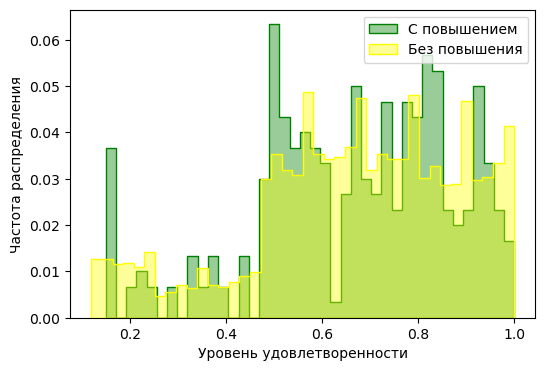

In [48]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=promotion, element='step', color='green', stat='probability', alpha=0.4, bins=40)
sns.histplot(data=no_promotion, element='step', color='yellow', stat='probability', alpha=0.4, bins=40)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Частота распределения')
plt.legend(['С повышением','Без повышения'])

In [49]:
# расчет дисперсии
print('Дисперсия по работникам с повышением:', round(np.var(promotion), 4))
print('Дисперсия по работникам без повышения:', round(np.var(no_promotion), 4))

Дисперсия по работникам с повышением: 0.0423
Дисперсия по работникам без повышения: 0.0473


In [50]:
# тест Флигнера-Киллина на равенство дисперсий
fligner = scipy.stats.fligner(promotion, no_promotion)
if (fligner.pvalue < 0.05):
    print('Равенство дисперсий отклонено')
else:
    print('Равенство дисперсий не отклонено')
fligner  

Равенство дисперсий не отклонено


FlignerResult(statistic=0.86917561128694, pvalue=0.3511836353988179)

In [51]:
# расчет критерия асимметрии и эксцесса для оценки нормальности распределений
data_skewness = round(scipy.stats.skew(promotion),2)
data_kurtosis = round(scipy.stats.kurtosis(promotion), 2)

if (1 > data_skewness > -1) and (1 > data_kurtosis > -1):
    print('Достаточная нормальность для использования параметрических тестов')
else:
    print('Недостаточная нормальность для использования параметрических тестов')
print('Асимметрия:', data_skewness,'Эксцесс:', data_kurtosis)

data_skewness = round(scipy.stats.skew(no_promotion), 2)
data_kurtosis = round(scipy.stats.kurtosis(no_promotion), 2)
if (1 > data_skewness > -1) and (1 > data_kurtosis > -1):
    print('Достаточная нормальность для использования параметрических тестов')
else:
    print('Недостаточная нормальность для использования параметрических тестов')
print('Асимметрия:', data_skewness,'Эксцесс:', data_kurtosis)

Достаточная нормальность для использования параметрических тестов
Асимметрия: -0.62 Эксцесс: -0.12
Достаточная нормальность для использования параметрических тестов
Асимметрия: -0.6 Эксцесс: -0.22


In [52]:
# тест Стьюдента
student =  scipy.stats.ttest_ind(promotion, no_promotion, equal_var=True)
if (student.pvalue < 0.05):
    print('Гипотеза об одинаковой удовлетворенности работой сотрудниками с повышением и без повышения отклонена. Нулевая гипотеза неверна')
else:
    print('Гипотеза об одинаковой удовлетворенности работой сотрудниками с повышением и без повышения не отклонена. Нулевая гипотеза верна')
student

Гипотеза об одинаковой удовлетворенности работой сотрудниками с повышением и без повышения не отклонена. Нулевая гипотеза верна


Ttest_indResult(statistic=0.13127088919461774, pvalue=0.8955633306917339)

#### Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [53]:
# статистические характеристики по признаку Уровень удовлетворенности работой по 2м выборкам
data.groupby('salary')['average_montly_hours'].describe().head(2)

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
high,1237.0,199.867421,47.710446,96.0,161.0,199.0,241.0,307.0
low,7316.0,200.996583,50.832214,96.0,155.0,199.0,246.0,310.0


In [54]:
# с целью построения нормализованной гистограммы разобьем данные на 2е выборки
high_salary = data[data['salary'] == 'high']['average_montly_hours']
low_salary = data[data['salary'] == 'low']['average_montly_hours']

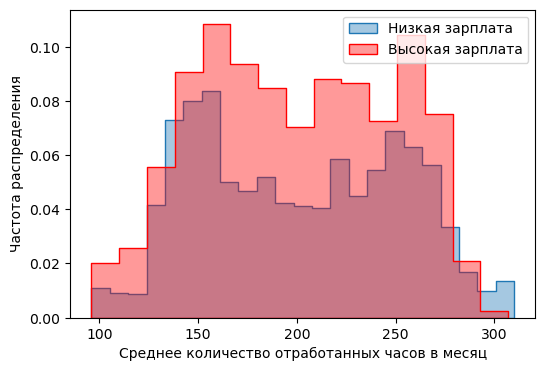

In [55]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=data, x=low_salary, element='step', stat='probability', alpha=0.4)
sns.histplot(data=data, x=high_salary, element='step', color='red', stat='probability', alpha=0.4)
plt.xlabel('Среднее количество отработанных часов в месяц')
plt.ylabel('Частота распределения')
plt.legend(['Низкая зарплата','Высокая зарплата'])

In [56]:
# расчет дисперсии для двух выборок
print('Дисперсия для выборки по сотрудникам с низкой зарплатой:', round(np.var(low_salary), 2))
print('Дисперсия для выборки по сотрудникам с высокой зарплатой:', round(np.var(high_salary), 2))

Дисперсия для выборки по сотрудникам с низкой зарплатой: 2583.56
Дисперсия для выборки по сотрудникам с высокой зарплатой: 2274.45


In [57]:
# тест Флигнера-Киллина на равенство дисперсий
fligner = scipy.stats.fligner(high_salary, low_salary)
if (fligner.pvalue < 0.05):
    print('Равенство дисперсий отклонено')
else:
    print('Равенство дисперсий не отклонено')
fligner   

Равенство дисперсий отклонено


FlignerResult(statistic=18.88947426655736, pvalue=1.3851483977003602e-05)

In [58]:
# тест Колмагорова-Смирнова на нормальность распределения
kolm = scipy.stats.kstest(high_salary, 'norm')
if (kolm.pvalue < 0.05):
    print('Нормальность распределения для сотрудников с высокой зарплатой отклонена')
else:
    print('Нормальность распределения для сотрудников с высокой зарплатой не отклонена')
print(kolm)

kolm = scipy.stats.kstest(low_salary, 'norm')
if (kolm.pvalue < 0.05):
    print('Нормальность распределения для сотрудников с низкой зарплатой отклонена')
else:
    print('Нормальность распределения для сотрудников с низкой зарплатой не отклонена')
print(kolm)

Нормальность распределения для сотрудников с высокой зарплатой отклонена
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=96, statistic_sign=-1)
Нормальность распределения для сотрудников с низкой зарплатой отклонена
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=96, statistic_sign=-1)


In [59]:
# тест Манна-Уитни
mannwhitneyu =  scipy.stats.mannwhitneyu(high_salary, low_salary)
if (mannwhitneyu.pvalue < 0.05):
    print('Гипотеза об идентичном количестве проводимого на работе времени отклонена. Нулевая гипотеза неверна')
else:
    print('Гипотеза об идентичном количестве проводимого на работе времени не отклонена. Нулевая гипотеза верна')
mannwhitneyu

Гипотеза об идентичном количестве проводимого на работе времени не отклонена. Нулевая гипотеза верна


MannwhitneyuResult(statistic=4507096.5, pvalue=0.8241330720858693)

### 6. Модель машинного обучения

##### Дерево классификации

In [60]:
# импортируем необходимые библиотеки
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [61]:
X = trans_data.drop('left', axis = 1) # признаки, на основании которых строится прогноз
y = trans_data['left'] # прогнозируемая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разбиваем данные на обучающую и тестовую выборки

In [62]:
# создание экземпляра модели дерева классификации
Tree = DecisionTreeClassifier(random_state=42, 
                              min_samples_split=5, #мин число объектов в узле
                              min_samples_leaf=5, #мин число объектов в листе
                              max_depth=5, # число слоев
                              class_weight='balanced')

# обучение модели
Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [63]:
# применение модели на тестовых данных
y_pred = Tree.predict(X_test)

In [64]:
# оценка предсказания для тестовых данных
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      2294
           1       0.81      0.93      0.87       706

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.94      0.93      0.93      3000



In [65]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred)).T

,0,1
0,2141,48
1,153,658


In [66]:
# применение модели на обучающих данных
y_pred_train = Tree.predict(X_train)

In [67]:
# оценка предсказания для обучающих данных
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      9134
           1       0.82      0.95      0.88      2865

    accuracy                           0.94     11999
   macro avg       0.90      0.94      0.92     11999
weighted avg       0.94      0.94      0.94     11999



In [68]:
# вклад каждой характеристики в модель дерева классификации
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': Tree.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
round(feature_importances, 4)

,Feature,Importance
0,satisfaction_level,0.4539
4,time_spend_company,0.3792
1,last_evaluation,0.1011
3,average_montly_hours,0.0551
2,number_project,0.0094
7,department,0.0013
5,Work_accident,0.0000
6,promotion_last_5years,0.0000
8,salary,0.0000


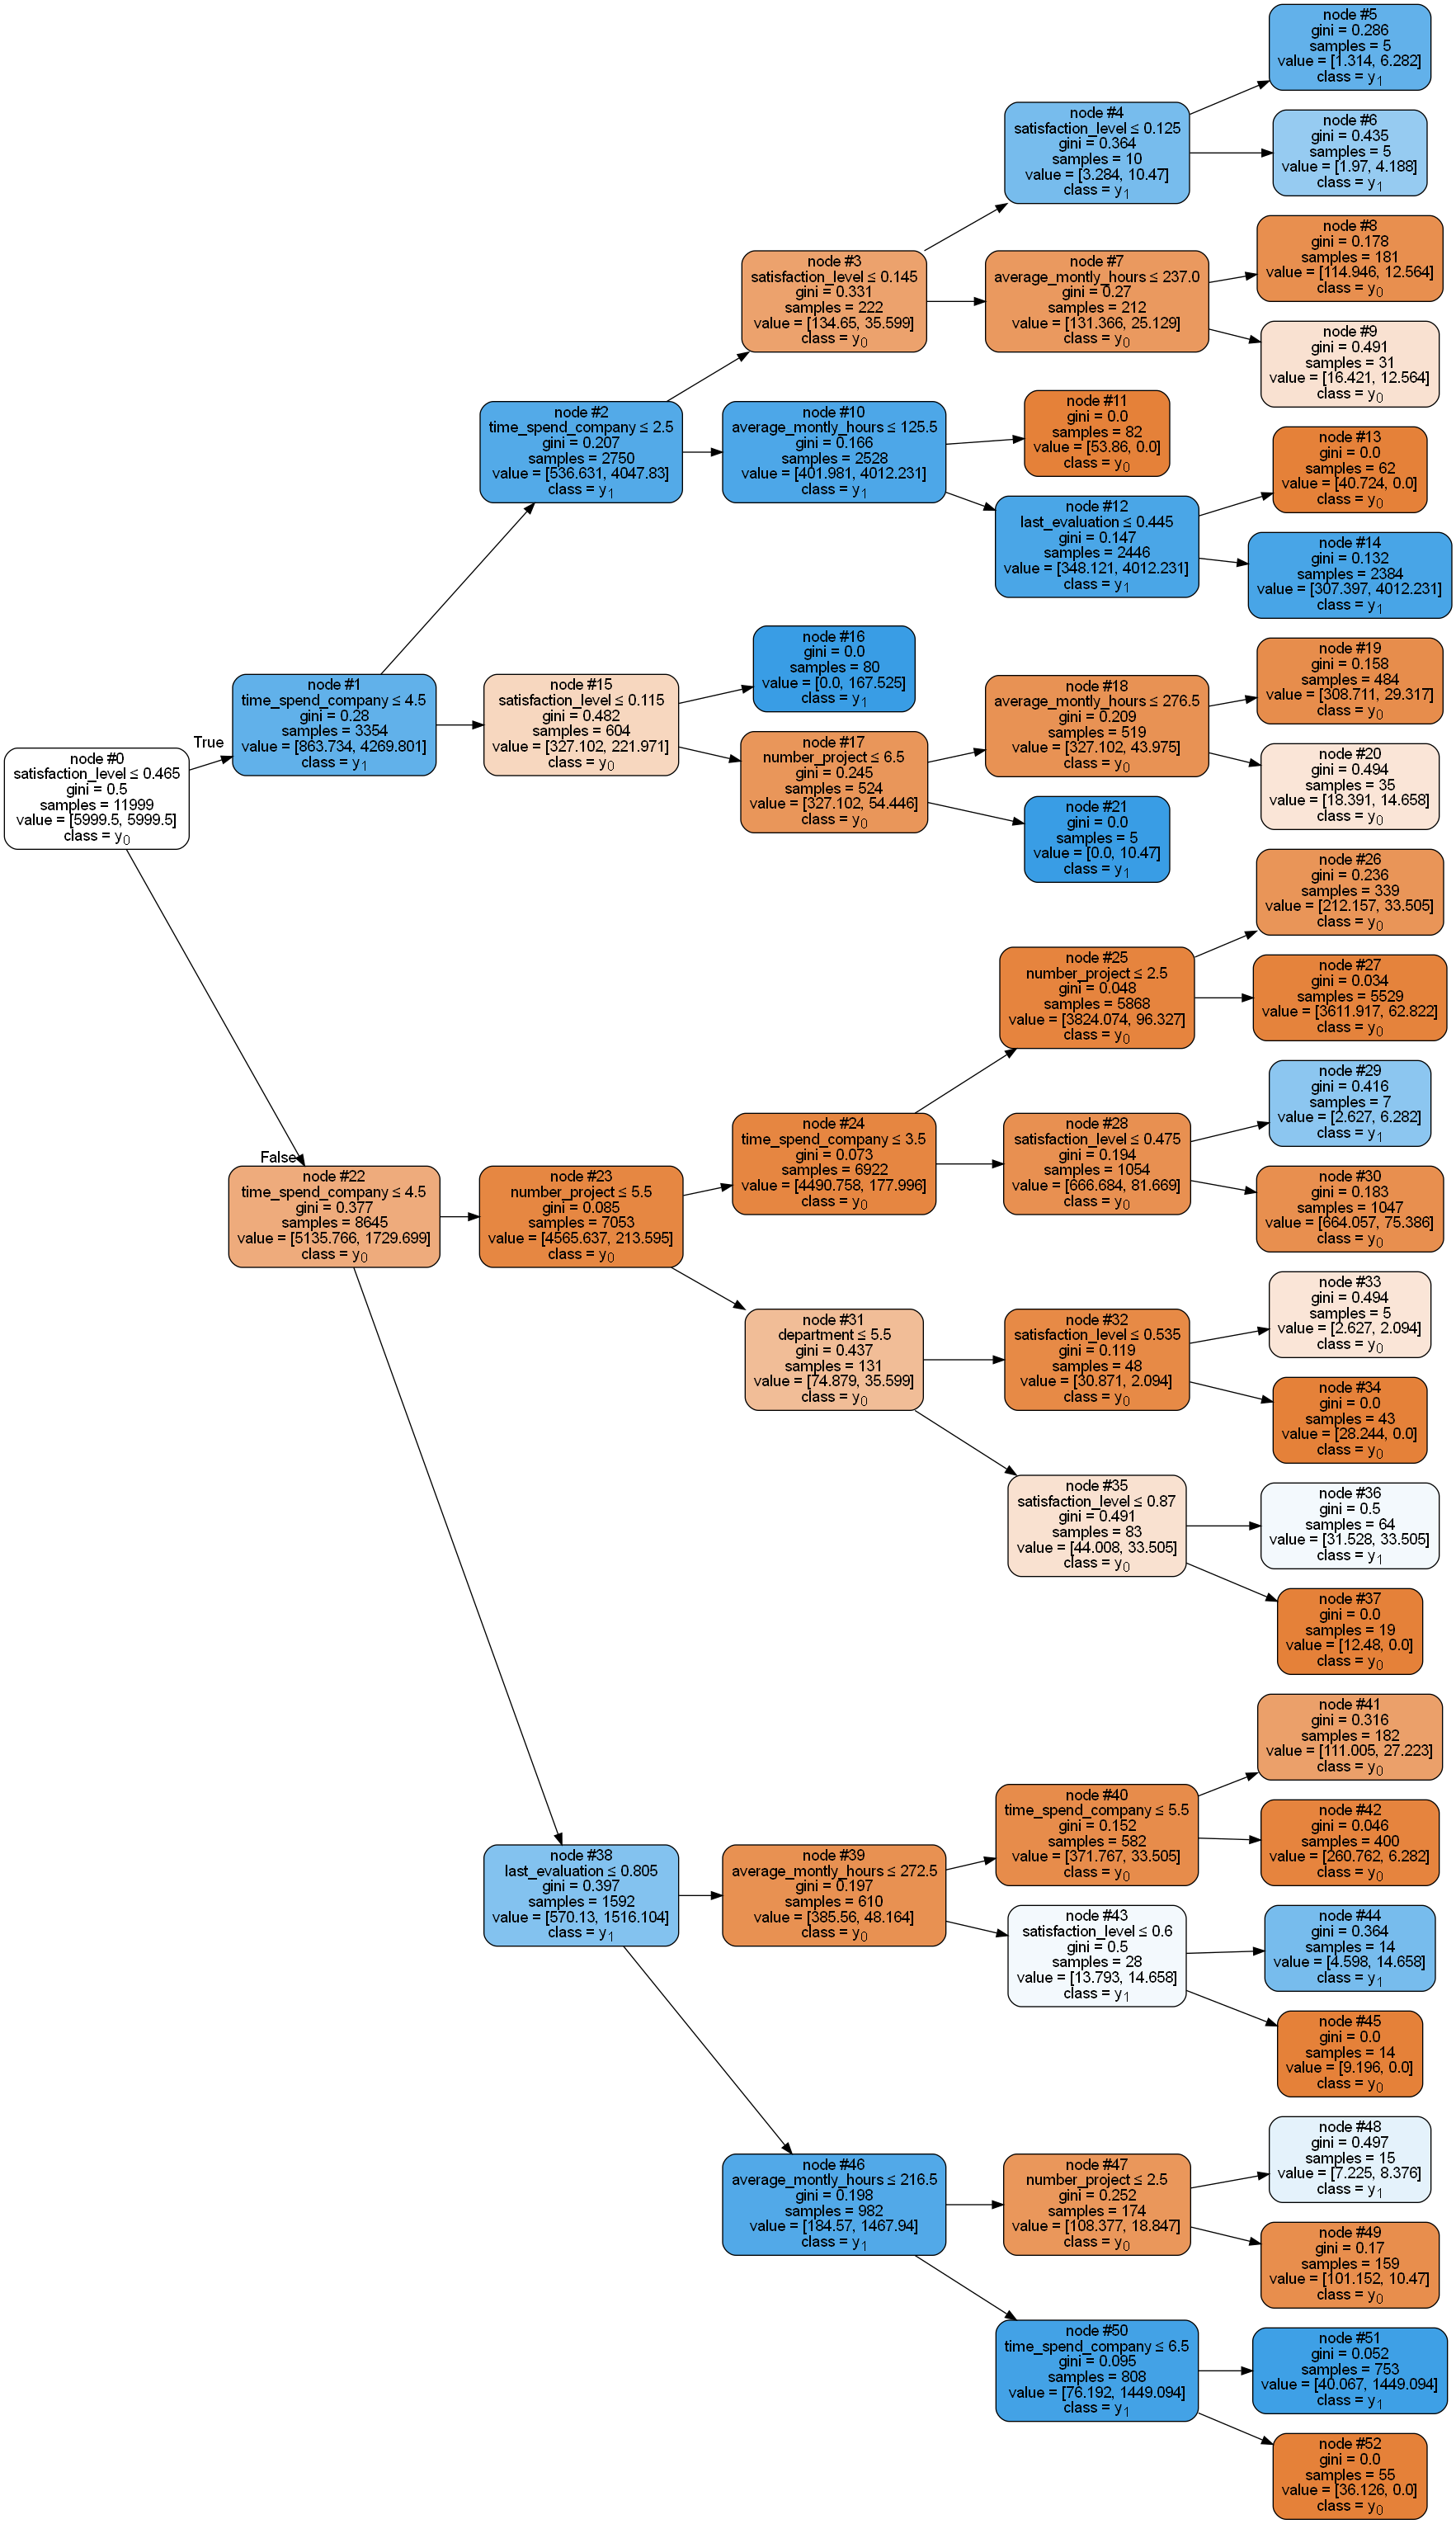

In [184]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call
export_graphviz(Tree, out_file='tree.dot', 
                feature_names=X.columns, class_names=True,
                impurity=True, rotate=True,
                filled=True, rounded=True, node_ids=True,  
                special_characters=True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])
Image('tree.png')

##### Случайный лес

In [69]:
# создание экземпляра модели случайного леса
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=30, max_depth=5, warm_start=False, class_weight='balanced')

In [70]:
X = trans_data.drop('left', axis = 1) # признаки, на основании которых строится прогноз
y = trans_data['left'] # прогнозируемая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разбиваем данные на обучающую и тестовую выборки

In [71]:
# обучение модели
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=30,
                       random_state=42)

In [72]:
# применение модели на тестовых данных
y_pred = rfc.predict(X_test)

In [73]:
# оценка предсказания для тестовых данных
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.93      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [74]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred)).T

,0,1
0,2249,69
1,45,637


In [75]:
# применение модели на обучающих данных
y_pred_train = rfc.predict(X_train)

In [76]:
# оценка предсказания для обучающих данных
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9134
           1       0.93      0.93      0.93      2865

    accuracy                           0.97     11999
   macro avg       0.95      0.95      0.95     11999
weighted avg       0.97      0.97      0.97     11999



In [77]:
# вклад каждой характеристики в модель случайного леса
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
round(feature_importances, 4)

,Feature,Importance
0,satisfaction_level,0.4539
4,time_spend_company,0.3792
1,last_evaluation,0.1011
3,average_montly_hours,0.0551
2,number_project,0.0094
7,department,0.0013
5,Work_accident,0.0000
6,promotion_last_5years,0.0000
8,salary,0.0000
